# Vector as an object

Objects in real world can modelled with numbers and categories: age, weight, gender, name (one of categories) - for a person. Max speed, weight, color (one of) - for a car.

In progamming we use records, classes and structures to encode those properties. But almost every property falls into one of 4 categories:
- $\mathbb{R}$ - real values (distance)
- $\mathbb{Z}$ - integer ordered values (school grade)
- binary $\mathbb{B}$ features (yes/no)
- category or categories from an unordered set. Here we use [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) (e.g. names, tags).

Vector $v$ is an ordered collection of values.

N-dimensional vector: $v\in \mathbb{R}^N$ is written as:

$\vec{a} = \begin{bmatrix} a_1  \\ a_2 \\ ... \\ a_N \end{bmatrix}$

or to simplify: $a = (a_1, a_2, ..., a_N)^T$.

In python you can use `list`, `tuple` of `np.ndarray`.

## Vector space

Vectors can be added, multiplied to a number.

$\begin{bmatrix} 1  \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 3  \\ 4.01 \\ 2 \end{bmatrix} = \begin{bmatrix} 4  \\ 6.01 \\ 5 \end{bmatrix}$

$2 * \begin{bmatrix} 1  \\ 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 2  \\ 4 \\ 6 \end{bmatrix}$



In [55]:
performances = ['bad', 'average', 'good', 'excellent']
names = ['Xenia', 'Bob', 'John', 'Mary', 'Stas']
achievements = ['sports', 'music', 'arts', 'math']

class Student:
    def __init__(self, name, age, ach, weight, gender, performance):
        self.name = name
        self.age = age
        self.ach = ach
        self.weight = weight
        self.gender = gender
        self.performance = performance
    
    def to_vector(self):
        vector = []
        
        vector += [float(n == self.name) for n in names]
        
        # Z
        vector.append(float(self.age))
        # one-hot*
        for a in achievements:
            vector.append(float(a in self.ach))
        # R
        vector.append(self.weight)        
        # binary
        vector.append(float(self.gender == 'male'))
        # one-hot
        vector.append(float(performances.index(self.performance)))

        
        return vector
    
stas = Student('Stas', 32, {'music'}, 105.0, 'male', 'good').to_vector()
print(stas)

[0.0, 0.0, 0.0, 0.0, 1.0, 32.0, 0.0, 1.0, 0.0, 0.0, 105.0, 1.0, 2.0]


In [56]:
# TODO: add your name to the list and encode yourself. Is your vector similar to my?

me = Student('', 0, {}, 0.0, 'female', 'bad').to_vector()
print(me)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [57]:
# Assume, you became older for 1 year. This change can be encoded with a vector:

grow_older = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

import numpy as np

stas_n = np.asarray(stas)
older_n = np.asarray(grow_older)

new_stas_n = stas_n + older_n
print(new_stas_n)

[  0.   0.   0.   0.   1.  33.   0.   1.   0.   0. 105.   1.   2.]


# Eucliedean distance

$\begin{align}   
    dist(u, v) = \sqrt{\sum_{i=1}^N (u_i - v_i)^2}
\end{align}$

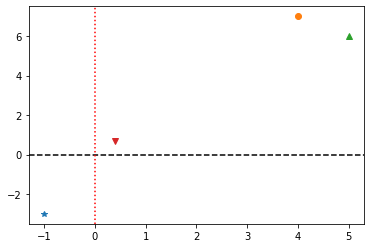

In [58]:
import matplotlib.pyplot as plt

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(color="red", linestyle=':')

u = [-1., -3]
v = [4., 7.]
t = [5., 6.]
w = [0.4, 0.7]

plt.plot(*u, marker='*')
plt.plot(*v, marker='o')
plt.plot(*t, marker='^')
plt.plot(*w, marker='v')
plt.show()

In [59]:
# TODO: write the code of euclidean distance

def dist(u, v):
    # write your code here
    return None

print(f"How similar am I to Stas: {dist(stas, me)}")

How similar am I to Stas: None


# Feature normalization
Similarity in the example is mostly defined by `weight` and `age` values. In practice we do feature normalization: bringing values to the same interval, usually $(0, 1)$ or $(-1, 1)$.

In [60]:
# TODO write the code that normalizes the data to 0..1

def normalize(v):
    # age - [5], 0..120 
    # weight - [10], 30..180
    # performance [12] - 0..3
    v2 = v.copy()
    return v2

print(normalize(stas))
print(f"How similar am I to Stas: {dist(normalize(stas), normalize(me))}")

[0.0, 0.0, 0.0, 0.0, 1.0, 32.0, 0.0, 1.0, 0.0, 0.0, 105.0, 1.0, 2.0]
How similar am I to Stas: None


# Vector norm

**Norm** $\| x\|$ - is a function which preserves the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality).

$\|\mathbf {x} +\mathbf {y} \|\leq \|\mathbf {x} \|+\|\mathbf {y} \|$

Widely used norm format for vectors is $L_p$ norm:

$\|\mathbf{x}\|_p=\left(\sum_i|x_i|^p\right)^{\frac{1}{p}}$

**Circle** is 

$C = \{x\in \mathbb{R}^N: \|x-center\|_p = r\}$


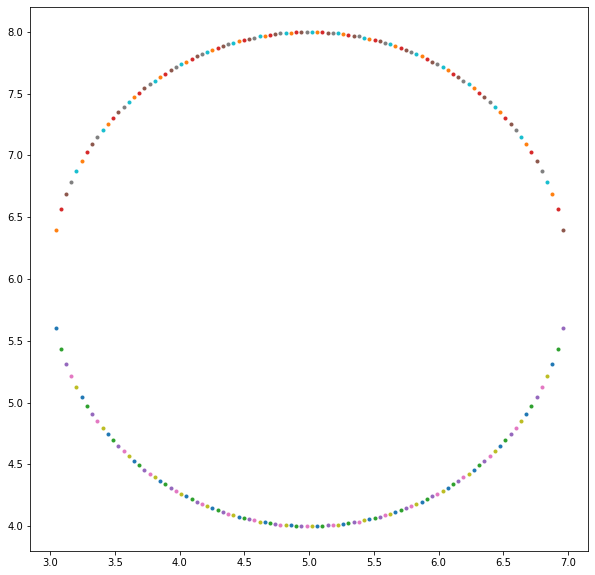

In [63]:
#TODO: 
# 2d case. for a given norm order find y values for a circle for a given x

def y2(x, radius, center):
    d = radius ** 2 - (x - center[0]) ** 2
    if d > 0:
        return [-d ** .5 + center[1], +d ** .5 + center[1]]
    else:
        return []

def y(x, radius, center, norm=2):
    # write your code here
    pass


center = [5, 6]
radius = 2

plt.figure(figsize=(10, 10))
for x in np.linspace(center[0] - radius, center[0] + radius, num=100):
    ys = y2(x, radius, center)
    for y in ys:
        plt.plot(x, y, marker='.')
plt.show()


plt.figure(figsize=(10, 10))
for x in np.linspace(center[0] - radius, center[0] + radius, num=100):
    ys = y(x, radius, center, norm=5)
    for y in ys:
        plt.plot(x, y, marker='.')
plt.show()

Hence,

$\|x\|_\infty=max|x_i|$


## Norming a vector

Is a procedure like this:

$\vec{u} = \frac{\vec{v}}{\|\vec{v}\|}$

# Dot product and cosine 

Normed vector loses it's amplidute, and keeps only "direction". This property is often used when we want to compare similarity in ideas rather than in scale.

## dot product

$\vec{a}\cdot\vec{b}=\sum_{i=1}^N a_i b_i$

$\begin{bmatrix} 1  \\ 2 \\ 3 \end{bmatrix}\cdot \begin{bmatrix} 4  \\ 5 \\ -6 \end{bmatrix} = 1 * 4 + 2 * 5 + 3 * (-6) = -4$


## cosine

$cos(\angle\vec{a},\vec{b}) = \frac{\vec{a}\cdot\vec{b}}{\|\vec{a}\|\cdot\|\vec{b}\|}$

In [65]:
# todo: implement cosine function and test that it is working
# answer should be (a,b): sqrt(2)/2 ~ 0.7, (u,v) = 0.0

def cos(a, b):
    pass

a = [20, 0]
b = [.1, .1]
print(cos(a, b))

u, v = [5, 5], [-6, 6]
print(cos(u, v))

None
None


## Cosine similarity and distance
**Similarity** is closer to 0 when arguments are less similar.

**Distance** is closer to 0 when arguments are more similar.

**Cosine** between vector and itself is 1, and 0 for orthogonal vectors.

$cosineSimilarity = cos(a, b)$

$cosineDistance = 1-cos(a, b)$


# RMSE

In [ ]:
https://docs.google.com/document/d/1z65VsK6_hEhIh24fRYyLq3utXP2LiSaA5fi9NntZngY/edit

Вектор как кортеж. По большому счёту, любая well-defined функция это вектор-вектор. И мы исследуем пространства определения, значения, свойства самих функций и как аналитические так и вычислительные. Мы обсудили харатеристики вычислительные, а теперь обсудим вещи, связанные с самим решениям.

На доске: Закодируем что-нибудь. Спортивные успехи: скорость бега 100м, жим лёжа и время в планке двух человек. И вычтем. И посмотрим - если 0, разницы нет, если величина - насколько выражена. 


Рассказать про нормализацию  [приведение к приемлемому - log, 1/n]

Векторы живут не просто в множествах, а на разных структурах (алгебрах, полях, многообразиях, группах): множествах, с наложенных на них ограничениями. Например, Евклидово пространство - это Rn (носитель); операции сложения друг с другом и умножения на число — скаляр; скалярное произведение. 
Вектор - это точка в пространстве Rn. 

Норма - числовая характеристика, неотрицательная, подчинённая правилу треугольника. Для векторов норма выражается вот так:  
окружность с радиусом 1 и центром в начале координат - это все вектора с нормой 1. Нормирование - приведение вектора “к длине 1” - деление на норму покомпонентно.

Интерактив на доске. Запишите явный вид L1-L3 норм, решите относительно x y=f(x). Нарисуйте единичные окружности для L1-L3 нормы в R2. Для этого постройте график функции (1-x^n)^(1/n). Он красивый.

Ln. 
L1 - окрестность Фон Неймана
Linf - окрестность (расстояние) ЧебышЁва.

Норма манхэттенских кварталов. Задавание окрестностей (сфера, шар) в фильтрах в обработке изображений. Выбор нормы зависит от смысла пространства, в котором мы действуем. Например, если есть воксели, длина кривой или прямой может быть посчитана на L2, но для связного маршрута роботу нужна 4-связность, а значит и длина маршрута в L1.

Скалярное произведение (dot product). На себя - квадрат L2-нормы. Если не на себя - длины на косинус угла между ними. Косинусная близость или косинусное расстояние. Собственно, косинус для угла между векторами вводится как. Ортогональность - это (a, b) =  = 0


Интерактив [code test]. - Задача “Скалярное произведение”.
Найдите угол между 2 точками в 3-мерном евклидовом пространстве. 
Напишите код (dot(double* a, double* b, size_t n), angle())
А теперь у нас есть (1) углы (2) расстояния (нормы). Получили полярные координаты!

Часто решение какой-то задачи является не точным. Численные методы, машинное обучение. Поэтому оценка отклонения вычисления измеряется одним из 2 способов:
Как средняя норма(*) ошибки - RMSE - если результат это список.
Как отклонение от ожидаемого результата - cosine similarity - если результат одиночный.

Интерактив [code test]. Подберите коэффициенты функции (решите обратную задачу) минимизировав ошибку RMSE и average cosine.
